In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install num2words
import num2words
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import math
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 116 kB 33.4 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=42f07f7c1f34ab54a1b14b0c2c6acdaf8b01c989e3d305d3abc69bf443e8d43e
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


In [ ]:
#step 1- Mount your Google Drive to Collaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/ABSA_MS_Research_Project/roberta_labelling.csv')

In [ ]:
df.head()

,Unnamed: 0,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score
0,0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,0.314967,0.201532,0.273320,0.229622,0.141261,room,0.314967,POSITIVE,0.998728
1,1,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,arrived late evening took advice previous rev...,0.190782,0.280859,0.244333,0.333305,0.112914,service,0.333305,POSITIVE,0.982104
2,2,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,check quick easy,0.127808,0.147495,0.227857,0.233826,0.187619,service,0.233826,POSITIVE,0.998047
3,3,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,little disappointed non existent view room ro...,0.480039,0.230525,0.221496,0.174181,0.158015,room,0.480039,NEGATIVE,0.999477
4,4,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,bed comfortable woke stiff neck high pillows,0.184796,0.073833,0.020726,0.015454,0.106296,room,0.184796,NEGATIVE,0.998174


In [ ]:
len(df)

10003

Split into train and test



In [ ]:
df.head()

,Unnamed: 0,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score
0,0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,0.314967,0.201532,0.273320,0.229622,0.141261,room,0.314967,POSITIVE,0.998728
1,1,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,arrived late evening took advice previous rev...,0.190782,0.280859,0.244333,0.333305,0.112914,service,0.333305,POSITIVE,0.982104
2,2,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,check quick easy,0.127808,0.147495,0.227857,0.233826,0.187619,service,0.233826,POSITIVE,0.998047
3,3,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,little disappointed non existent view room ro...,0.480039,0.230525,0.221496,0.174181,0.158015,room,0.480039,NEGATIVE,0.999477
4,4,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,bed comfortable woke stiff neck high pillows,0.184796,0.073833,0.020726,0.015454,0.106296,room,0.184796,NEGATIVE,0.998174


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


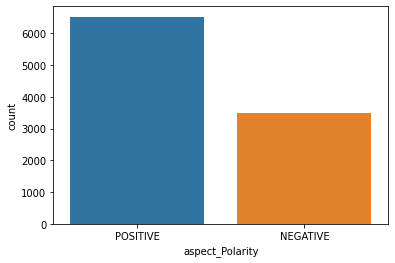

In [ ]:
import seaborn as sns
sns.countplot(df.aspect_Polarity)

In [ ]:
df.aspect_Polarity.value_counts()

POSITIVE    6517
NEGATIVE    3486
Name: aspect_Polarity, dtype: int64

In [ ]:
 from sklearn.utils import shuffle
 def cap_data(df):
    cap_df= pd.DataFrame()
    cap_df = df[df['aspect_Polarity']== 'POSITIVE'][:4000]
    cap_df = cap_df.append(df[df['aspect_Polarity']== 'NEGATIVE'])
    cap_df = shuffle(cap_df)   
    return(cap_df)

df = cap_data(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


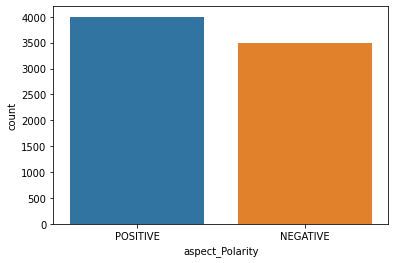

In [ ]:
import seaborn as sns
sns.countplot(df.aspect_Polarity)

In [ ]:
df.aspect_Polarity.value_counts()

POSITIVE    4000
NEGATIVE    3486
Name: aspect_Polarity, dtype: int64

In [ ]:
df.head()

,Unnamed: 0,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score
2894,2894,"waterview room balcony worth money, husband st...",4,"waterview room balcony worth money, husband st...",husband stayed edgewater recent visit seattle,0.064064,0.085866,0.156090,0.066585,-0.010137,location,0.156090,POSITIVE,0.997764
1296,1296,awesome location helpful staff clean rooms sta...,5,awesome location helpful staff clean rooms sta...,awesome location helpful staff clean rooms sta...,0.278543,0.236254,0.304204,0.216297,0.082805,location,0.304204,POSITIVE,0.998883
2658,2658,"loved andra, visited andra stayed nights, wond...",5,"loved andra, visited andra stayed nights, wond...",visited andra stayed nights,0.229050,0.141533,0.259954,0.130289,0.149254,location,0.259954,POSITIVE,0.996379
4066,4066,"avoid place bought w thing early, hotel darker...",2,"avoid place bought w thing early, hotel darker...",loud thumping music fills lobby not want hear...,0.148920,0.240604,0.062798,0.119504,0.011103,staff,0.240604,NEGATIVE,0.997122
1769,1769,good place stay stayed nights end august 2008....,4,good place stay stayed nights end august two t...,staff friendly helpful offered store bag week...,0.188311,0.392674,0.319807,0.321638,0.202356,staff,0.392674,POSITIVE,0.998710


In [ ]:
# labelling pos as 1 and neg as 0
def making_label(st):
    if(st=='POSITIVE'):
      return 1
    else:
        return 0
    
df['label'] = df['aspect_Polarity'].apply(making_label)
print(df.shape)

(7486, 15)


In [ ]:
# conversion of input data
df = pd.DataFrame({
    'text': df['sentence_reviews'].replace(r'\n', ' ', regex=True),
    'label': df['label']
})


In [ ]:
df.head()

,text,label
2894,husband stayed edgewater recent visit seattle,1
1296,awesome location helpful staff clean rooms sta...,1
2658,visited andra stayed nights,1
4066,loud thumping music fills lobby not want hear...,0
1769,staff friendly helpful offered store bag week...,1


In [ ]:
print(df.shape)

(7486, 2)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
X = df['text']
y = df['label']

In [ ]:
X = X.astype(str)

In [ ]:
cv=CountVectorizer()
X=cv.fit_transform(X)

**Train_Test_Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5988, 7678)
(1498, 7678)
(5988,)
(1498,)


In [ ]:
#Defined object from library classification 
LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
NB = MultinomialNB()
SVM = SVC()
XGBOOST = XGBClassifier()
MLP = MLPClassifier()

In [ ]:
import sklearn

In [ ]:
# make for loop for classification 

li = [LR,DTR,RFR,KNR,NB,SVM,XGBOOST,MLP]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(y_test,ypred)*100)
    print(i,':',sklearn.metrics.classification_report(y_test,ypred,target_names=['POSITIVE','NEGATIVE']))
    d.update({str(i):i.score(X_test,y_test)*100})

LogisticRegression() : 76.56875834445927
LogisticRegression() :               precision    recall  f1-score   support

    POSITIVE       0.76      0.74      0.75       717
    NEGATIVE       0.77      0.79      0.78       781

    accuracy                           0.77      1498
   macro avg       0.77      0.76      0.76      1498
weighted avg       0.77      0.77      0.77      1498

DecisionTreeClassifier() : 68.89185580774367
DecisionTreeClassifier() :               precision    recall  f1-score   support

    POSITIVE       0.69      0.64      0.66       717
    NEGATIVE       0.69      0.73      0.71       781

    accuracy                           0.69      1498
   macro avg       0.69      0.69      0.69      1498
weighted avg       0.69      0.69      0.69      1498

RandomForestClassifier() : 74.16555407209613
RandomForestClassifier() :               precision    recall  f1-score   support

    POSITIVE       0.73      0.72      0.73       717
    NEGATIVE       0.75      

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot") 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import re

In [ ]:
d.keys()

dict_keys(['LogisticRegression()', 'DecisionTreeClassifier()', 'RandomForestClassifier()', 'KNeighborsClassifier()', 'MultinomialNB()', 'SVC()', 'XGBClassifier()', 'MLPClassifier()'])

In [ ]:
list(d.keys())

['LogisticRegression()',
 'DecisionTreeClassifier()',
 'RandomForestClassifier()',
 'KNeighborsClassifier()',
 'MultinomialNB()',
 'SVC()',
 'XGBClassifier()',
 'MLPClassifier()']

In [ ]:
d.values()

dict_values([76.56875834445927, 68.89185580774367, 74.16555407209613, 61.815754339118826, 75.50066755674231, 75.83444592790387, 68.42456608811749, 71.42857142857143])

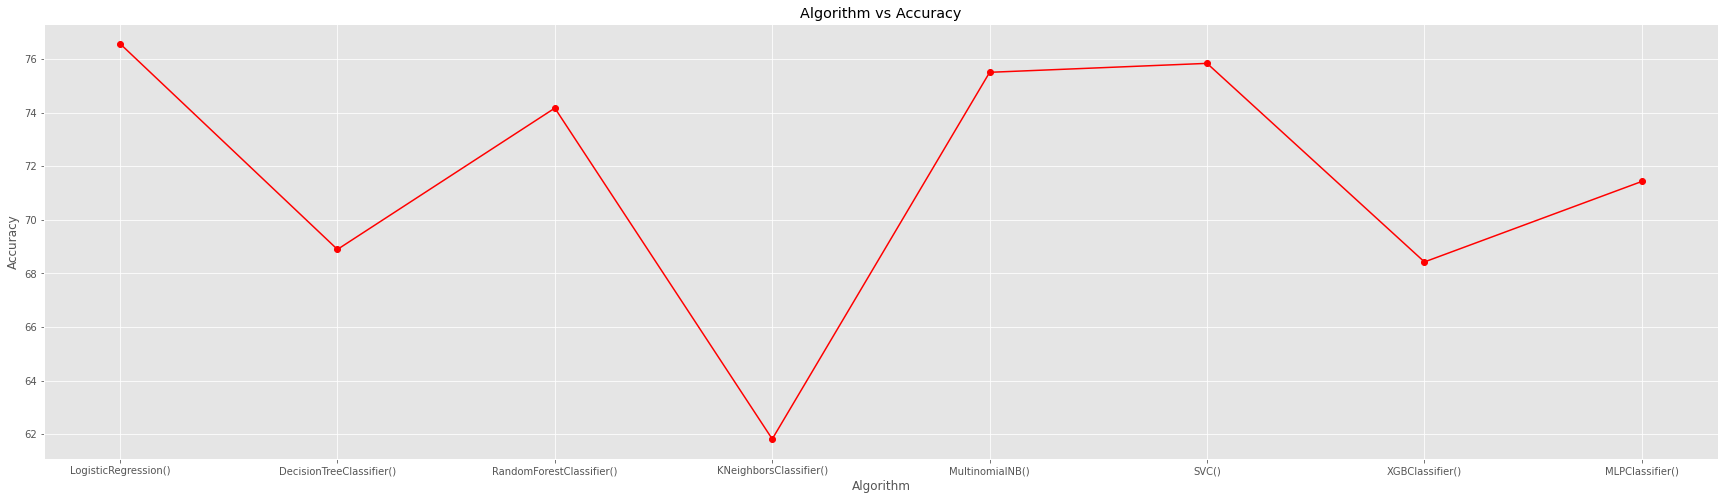

In [ ]:
plt.figure(figsize=(30, 8))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(list(d.keys()),list(d.values()),marker='o',color='red')
plt.show()